In [ ]:
!pip install numpy pandas geopandas matplotlib folium shapely descartes plotly


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
import plotly.express as px
import os 

In [41]:
os.chdir(r"C:\Users\aasha\OneDrive\Desktop\AASHE-Data")

In [42]:
# Importing all sheets into a dictionary of dataframes
all_sheets = pd.read_excel('Final_Sheet.xlsx', sheet_name=None)




In [43]:
# Accessing a specific dataframe
df_locations = all_sheets['Reports_Locations']

In [44]:
df_locations

,Institution,Location,STARS Version,Rating,Valid Through
0,"Penn State Erie, The Behrend College","United States , PA",2.1,Bronze,"Aug. 14, 2023"
1,"California State University, Fresno","United States , CA",2.2,Bronze,"Nov. 24, 2023"
2,Indiana University South Bend,"United States , IN",2.1,Bronze,"Feb. 5, 2024"
3,Lewis University,"United States , IL",2.2,Bronze,2024-05-05 00:00:00
4,Kent State University,"United States , OH",2.2,Bronze,2024-05-12 00:00:00
...,...,...,...,...,...
1147,South Dakota School of Mines and Technology,"United States , SD",NaN,NaN,NaN
1148,Idaho State University,"United States , ID",NaN,NaN,NaN
1149,Fairleigh Dickinson University,"United States , NJ",NaN,NaN,NaN
1150,"Centro de Diseño, Cine y Televisión",Mexico,NaN,NaN,NaN


In [45]:
# Extracting state information with a check for string type
df_locations['State'] = df_locations['Location'].apply(
    lambda x: x.split(', ')[1] if isinstance(x, str) and len(x.split(', ')) > 1 else None
)



In [46]:
# Aggregating data by state
state_counts = df_locations['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number_of_Universities']


In [47]:
state_counts

,State,Number_of_Universities
0,CA,96
1,NY,90
2,PA,53
3,IL,42
4,MA,41
...,...,...
111,San Jose,1
112,ND,1
113,Santa Catarina,1
114,Bolivarian Republic of,1


In [49]:

# Map abbreviations to full names and add as a new column
state_counts['State_full'] = state_counts['State'].map(state_abbreviations)

# Check the updated DataFrame
print(state_counts.head())


  State  Number_of_Universities     State_full
0    CA                      96     California
1    NY                      90       New York
2    PA                      53   Pennsylvania
3    IL                      42       Illinois
4    MA                      41  Massachusetts


In [24]:
# Path to the shapefile
os.chdir(r"C:\Users\aasha\OneDrive\Desktop\AASHE-Data\ne_110m_admin_1_states_provinces")



In [25]:
shapefile_path = (r"C:\Users\aasha\OneDrive\Desktop\AASHE-Data\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp")


In [ ]:
# Load the shapefile
us_states = gpd.read_file(shapefile_path)

# Check the data
print(us_states.head())

In [27]:
print("Columns in us_states:", us_states.columns)
print("Columns in state_counts:", state_counts.columns)


Columns in us_states: Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)
Columns in state_counts: Index(['State', 'Number_of_Universities'], dtype='object')


In [76]:
state_counts

,State,Number_of_Universities,State_full
0,CA,96,California
1,NY,90,New York
2,PA,53,Pennsylvania
3,IL,42,Illinois
4,MA,41,Massachusetts
...,...,...,...
111,San Jose,1,NaN
112,ND,1,North Dakota
113,Santa Catarina,1,NaN
114,Bolivarian Republic of,1,NaN


In [36]:
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}


In [38]:
# Replace abbreviations with full names
state_counts['State'] = state_counts['State'].map(state_abbreviations).fillna(state_counts['State'])

# Check the DataFrame to ensure the mapping worked
state_counts

,State,Number_of_Universities


In [40]:
# Display unique state abbreviations from state_counts to verify against the dictionary
print(state_counts['State'].unique())


[]


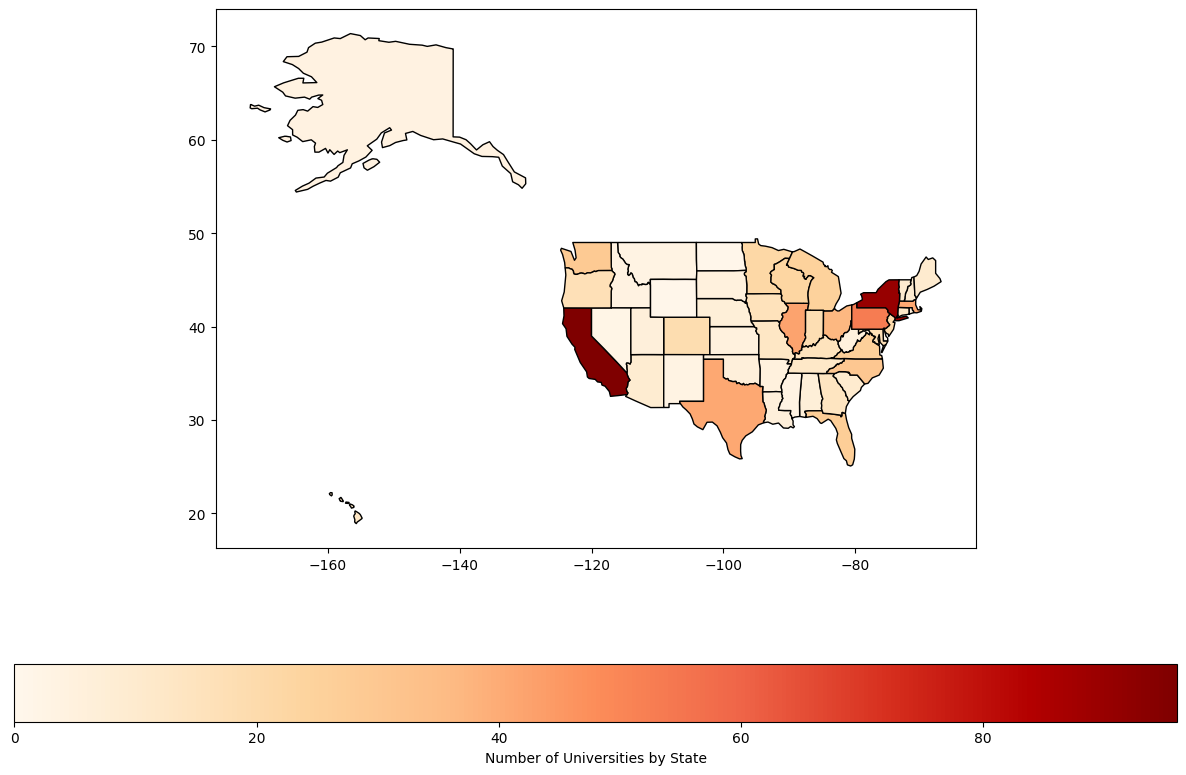

In [50]:
# Merging the shapefile with your data
map_data = us_states.merge(state_counts, how='left', left_on='name', right_on='State_full')

# Replace NaN values with 0 (assuming states with no universities should show as zero)
map_data['Number_of_Universities'] = map_data['Number_of_Universities'].fillna(0)

# Plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_data.plot(column='Number_of_Universities', ax=ax, cmap='OrRd', edgecolor='black', legend=True,
              legend_kwds={'label': "Number of Universities by State", 'orientation': "horizontal"})
plt.show()


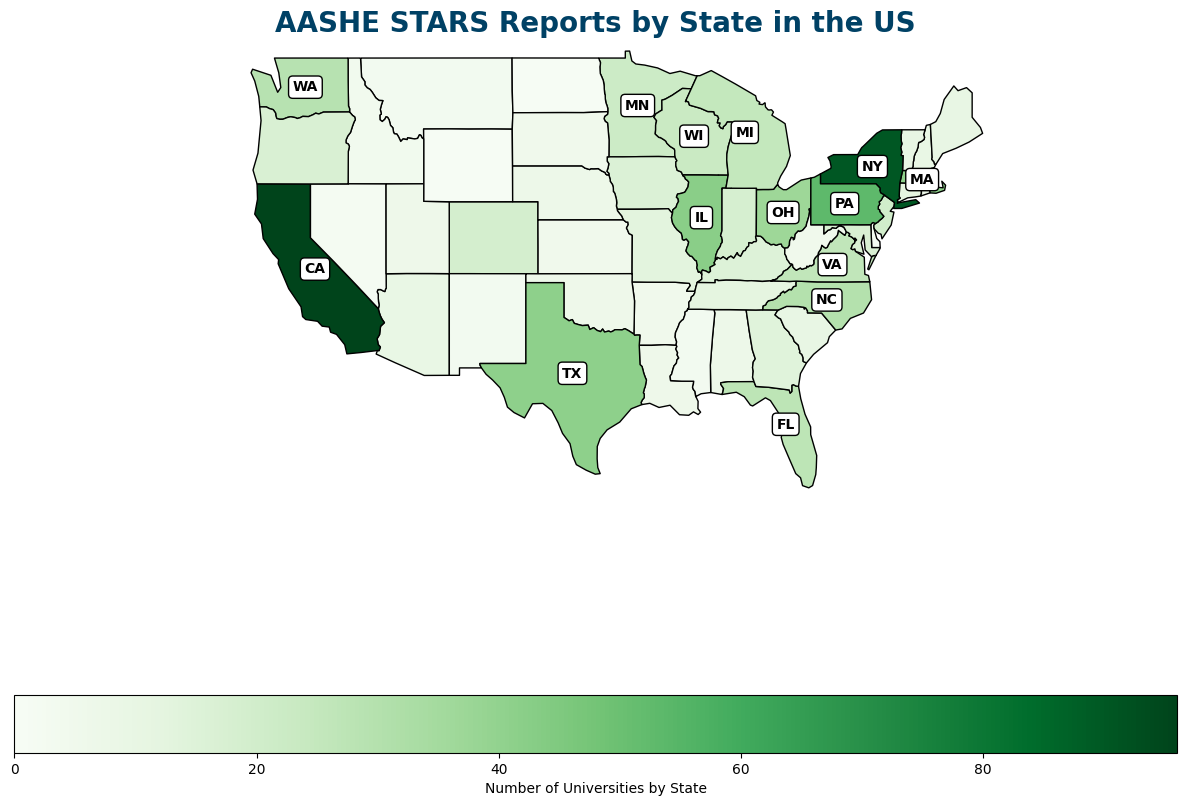

In [74]:
# Plot the map with green colormap
fig, ax = plt.subplots(1, figsize=(15, 10))
map_data.plot(column='Number_of_Universities', ax=ax, cmap='Greens', edgecolor='black', legend=True,
              legend_kwds={'label': "Number of Universities by State", 'orientation': "horizontal"},
              missing_kwds={
                  "color": "lightgrey",
                  "edgecolor": "red",
                  "hatch": "///",
                  "label": "Missing values"
              })

# Add state labels with white color, bold font, and background color
for idx, row in map_data.iterrows():
    if row['Number_of_Universities'] > 20:  # Filter condition
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)  # Add background color and border
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['State'], fontsize=10,
                ha='center', va='center', color='black', fontweight='bold', bbox=bbox_props)

# Customize the appearance
ax.set_axis_off()  # Turn off the axis
ax.set_title('AASHE STARS Reports by State in the US', fontsize=20, fontweight='bold', color='#004165')  # Use AASHE blue color
ax.set_facecolor('white')  # Set the background color

# Zoom in on a specific region
ax.set_xlim(-130, -65)  # Adjust the x-axis limits as needed
ax.set_ylim(20, 50)     # Adjust the y-axis limits as needed

plt.show()



In [80]:
df_locations

,Institution,Location,STARS Version,Rating,Valid Through,State,Full_State_Name
0,"Penn State Erie, The Behrend College","United States , PA",2.1,Bronze,"Aug. 14, 2023",PA,Pennsylvania
1,"California State University, Fresno","United States , CA",2.2,Bronze,"Nov. 24, 2023",CA,California
2,Indiana University South Bend,"United States , IN",2.1,Bronze,"Feb. 5, 2024",IN,Indiana
3,Lewis University,"United States , IL",2.2,Bronze,2024-05-05 00:00:00,IL,Illinois
4,Kent State University,"United States , OH",2.2,Bronze,2024-05-12 00:00:00,OH,Ohio
...,...,...,...,...,...,...,...
1147,South Dakota School of Mines and Technology,"United States , SD",NaN,NaN,NaN,SD,South Dakota
1148,Idaho State University,"United States , ID",NaN,NaN,NaN,ID,Idaho
1149,Fairleigh Dickinson University,"United States , NJ",NaN,NaN,NaN,NJ,New Jersey
1150,"Centro de Diseño, Cine y Televisión",Mexico,NaN,NaN,NaN,None,NaN


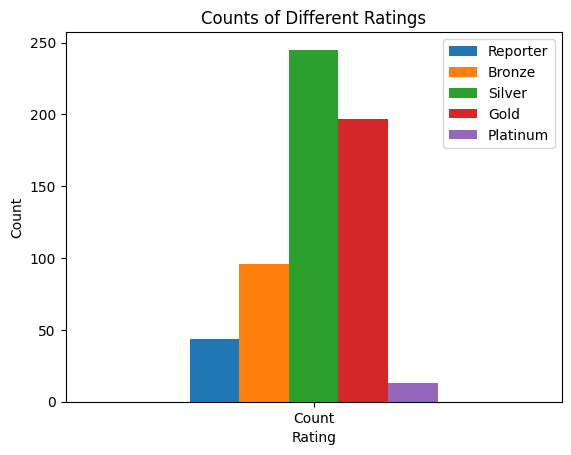

In [88]:
# Assuming you have a DataFrame df_locations with columns 'Rating' and 'State'

# Define a function to count occurrences of a specific rating in the Rating column
def count_rating(rating):
    return df_locations['Rating'].str.count(rating)

# Counting occurrences of each rating
reporter_count = count_rating('Reporter')
bronze_count = count_rating('Bronze')
silver_count = count_rating('Silver')
gold_count = count_rating('Gold')
platinum_count = count_rating('Platinum')

# Creating a DataFrame with the counts
rating_counts = pd.DataFrame({
    'Reporter': reporter_count.sum(),
    'Bronze': bronze_count.sum(),
    'Silver': silver_count.sum(),
    'Gold': gold_count.sum(),
    'Platinum': platinum_count.sum()
}, index=['Count'])

# Plotting the table
fig, ax = plt.subplots()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colors for the bars
rating_counts.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Counts of Different Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.show()




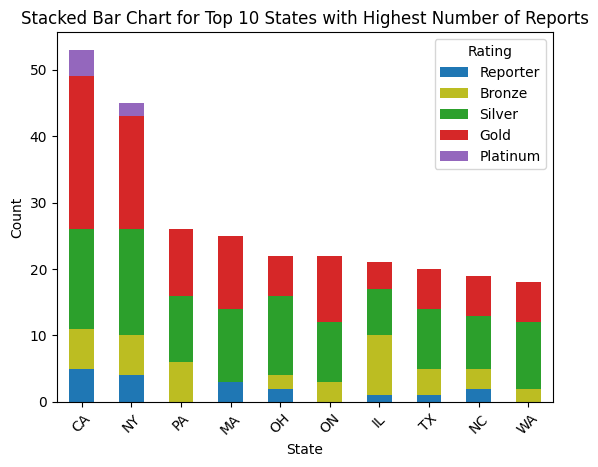

In [91]:
# Stacked bar chart for top 10 states with highest number of reports
top_states = df_locations['State'].value_counts().nlargest(10).index
df_top_states = df_locations[df_locations['State'].isin(top_states)]

# Counting the number of each rating for each state
rating_counts_by_state = pd.DataFrame({
    'Reporter': df_top_states['Rating'].str.count('Reporter').groupby(df_top_states['State']).sum(),
    'Bronze': df_top_states['Rating'].str.count('Bronze').groupby(df_top_states['State']).sum(),
    'Silver': df_top_states['Rating'].str.count('Silver').groupby(df_top_states['State']).sum(),
    'Gold': df_top_states['Rating'].str.count('Gold').groupby(df_top_states['State']).sum(),
    'Platinum': df_top_states['Rating'].str.count('Platinum').groupby(df_top_states['State']).sum()
})

# Sort states based on total count of ratings
total_ratings_by_state = rating_counts_by_state.sum(axis=1)
sorted_states = total_ratings_by_state.sort_values(ascending=False).index
rating_counts_by_state = rating_counts_by_state.loc[sorted_states]

# Plotting the stacked bar chart
fig, ax = plt.subplots()
colors = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd']  # Colors for the bars (Blue, Yellowish Orange, Green, Red, Purple)
rating_counts_by_state.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Stacked Bar Chart for Top 10 States with Highest Number of Reports')
ax.set_xlabel('State')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()

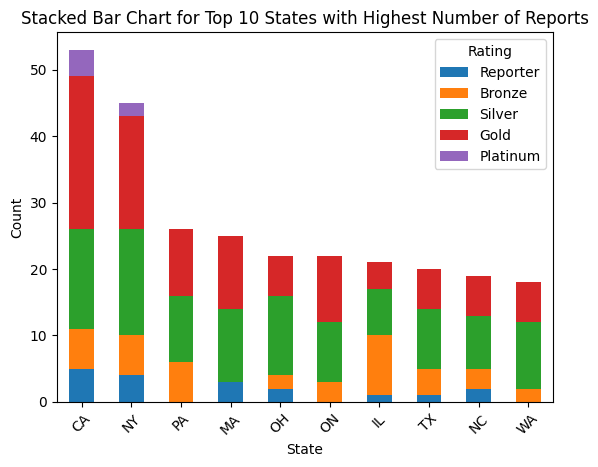

In [92]:
# Stacked bar chart for top 10 states with highest number of reports
top_states = df_locations['State'].value_counts().nlargest(10).index
df_top_states = df_locations[df_locations['State'].isin(top_states)]

# Counting the number of each rating for each state
rating_counts_by_state = pd.DataFrame({
    'Reporter': df_top_states['Rating'].str.count('Reporter').groupby(df_top_states['State']).sum(),
    'Bronze': df_top_states['Rating'].str.count('Bronze').groupby(df_top_states['State']).sum(),
    'Silver': df_top_states['Rating'].str.count('Silver').groupby(df_top_states['State']).sum(),
    'Gold': df_top_states['Rating'].str.count('Gold').groupby(df_top_states['State']).sum(),
    'Platinum': df_top_states['Rating'].str.count('Platinum').groupby(df_top_states['State']).sum()
})

# Sort states based on total count of ratings
total_ratings_by_state = rating_counts_by_state.sum(axis=1)
sorted_states = total_ratings_by_state.sort_values(ascending=False).index
rating_counts_by_state = rating_counts_by_state.loc[sorted_states]

# Plotting the stacked bar chart
fig, ax = plt.subplots()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colors for the bars
rating_counts_by_state.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Stacked Bar Chart for Top 10 States with Highest Number of Reports')
ax.set_xlabel('State')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()

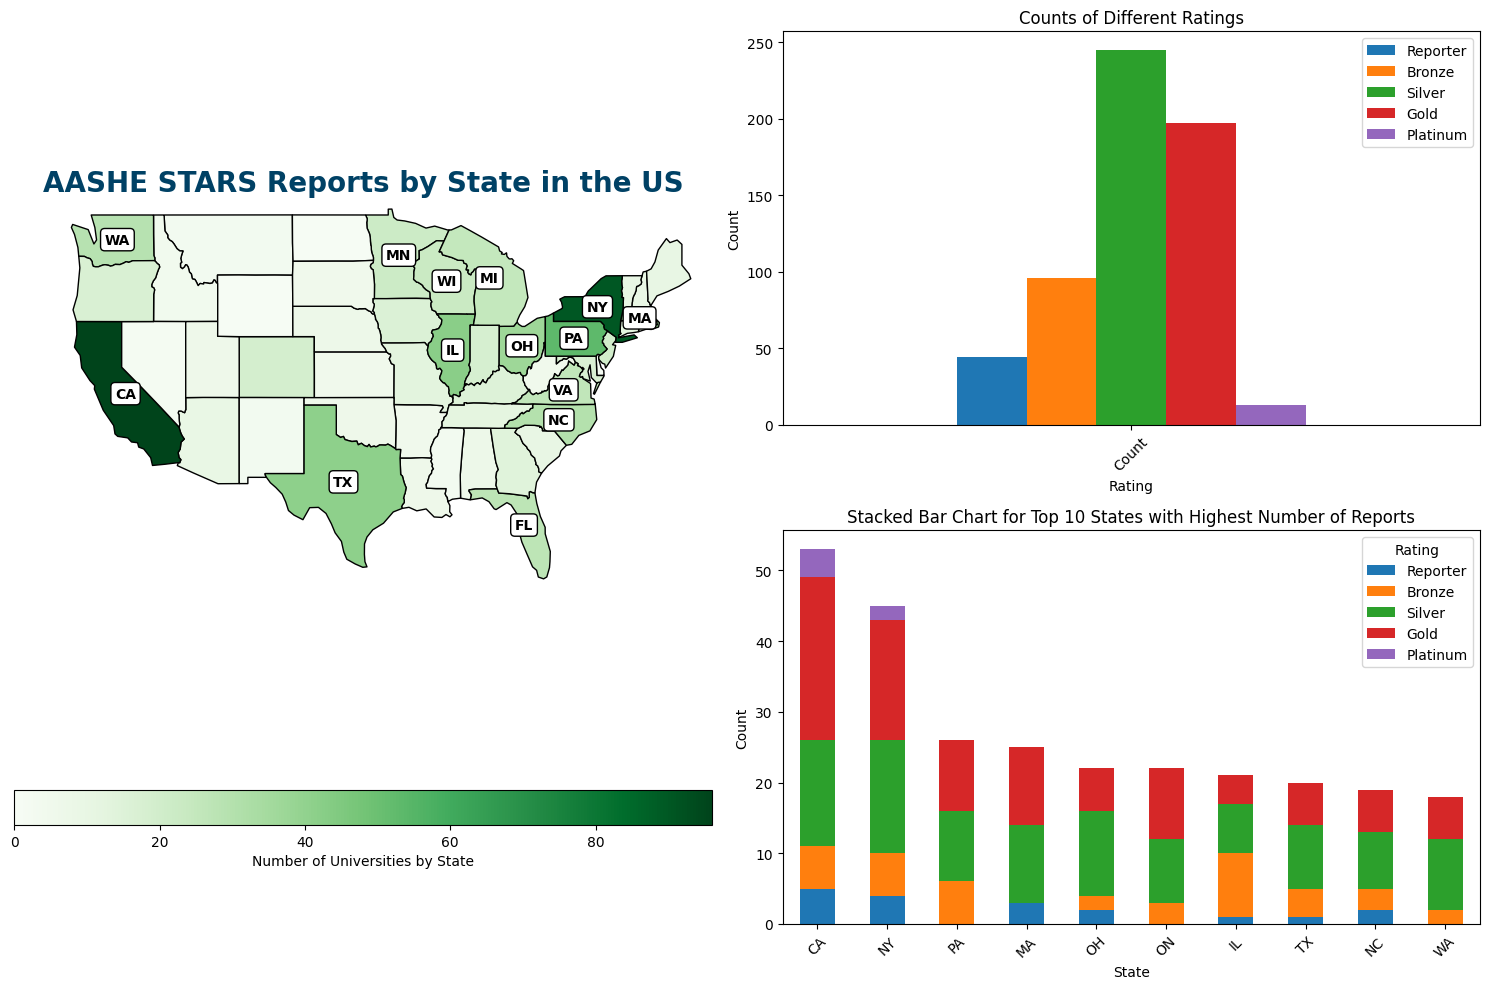

In [100]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a figure and GridSpec layout
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)

# Plot the map on the left
ax_map = fig.add_subplot(gs[:, 0])
map_data.plot(column='Number_of_Universities', ax=ax_map, cmap='Greens', edgecolor='black', legend=True,
              legend_kwds={'label': "Number of Universities by State", 'orientation': "horizontal"},
              missing_kwds={
                  "color": "lightgrey",
                  "edgecolor": "red",
                  "hatch": "///",
                  "label": "Missing values"
              })
ax_map.set_axis_off()  # Turn off the axis
ax_map.set_title('AASHE STARS Reports by State in the US', fontsize=20, fontweight='bold', color='#004165')  # Use AASHE blue color
ax_map.set_facecolor('white')  # Set the background color
ax_map.set_xlim(-130, -65)  # Adjust the x-axis limits as needed
ax_map.set_ylim(20, 50)     # Adjust the y-axis limits as needed

# Add state labels with white color, bold font, and background color
for idx, row in map_data.iterrows():
    if row['Number_of_Universities'] > 20:  # Filter condition
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)  # Add background color and border
        ax_map.text(row.geometry.centroid.x, row.geometry.centroid.y, row['State'], fontsize=10,
                    ha='center', va='center', color='black', fontweight='bold', bbox=bbox_props)

# Plot the counts chart on the top right
ax_counts = fig.add_subplot(gs[0, 1])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colors for the bars
rating_counts.plot(kind='bar', ax=ax_counts, color=colors)
ax_counts.set_title('Counts of Different Ratings')
ax_counts.set_xlabel('Rating')
ax_counts.set_ylabel('Count')
ax_counts.tick_params(axis='x', rotation=45)

# Plot the stacked bar chart on the bottom right
ax_stacked_bar = fig.add_subplot(gs[1, 1])
rating_counts_by_state.plot(kind='bar', stacked=True, ax=ax_stacked_bar, color=colors)
ax_stacked_bar.set_title('Stacked Bar Chart for Top 10 States with Highest Number of Reports')
ax_stacked_bar.set_xlabel('State')
ax_stacked_bar.set_ylabel('Count')
ax_stacked_bar.tick_params(axis='x', rotation=45)
ax_stacked_bar.legend(title='Rating')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



This is where the first part of the project ends.


In [102]:
df_counts = all_sheets['Counts_']

In [107]:
df_counts.rename(columns={'Count of Universities who have not reported the data for the metric':'Zero Counts'}, inplace= True)

In [112]:
df_counts

,Header,Zero Counts
0,Investment Disclosure,227
1,Committee on Investor Responsibility,182
2,Reporting Assurance,145
3,Sustainable Investment,126
4,Trademark Licensing,124
...,...,...
58,Campus as a Living Laboratory,1
59,Wellness Program,0
60,Student Life,0
61,Outreach Materials and Publications,0


<Axes: title={'center': 'Counts of Different Categories'}, ylabel='Credit'>

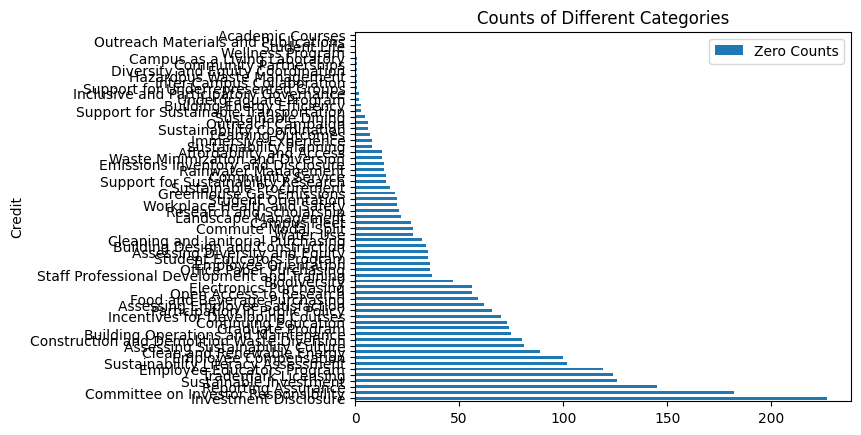

In [120]:


# Plot the counts data as a horizontal bar plot
df_counts.plot(kind='barh', title='Counts of Different Categories', ylabel='Credit')


In [121]:
import pandas as pd

# Create a dictionary with the data
data = {
    "Subsection": [
        "Academic Courses", "Learning Outcomes", "Undergraduate Program", "Graduate Program", 
        "Immersive Experience", "Sustainability Literacy Assessment", "Incentives for Developing Courses", 
        "Campus as a Living Laboratory", "Research and Scholarship", "Support for Sustainability Research", 
        "Open Access to Research", "Student Educators Program", "Student Orientation", "Student Life", 
        "Outreach Materials and Publications", "Outreach Campaign", "Assessing Sustainability Culture", 
        "Employee Educators Program", "Employee Orientation", "Staff Professional Development and Training", 
        "Community Partnerships", "Inter-Campus Collaboration", "Continuing Education", "Community Service", 
        "Participation in Public Policy", "Trademark Licensing", "Outdoor Air Quality/Emmisions inventory", 
        "Greenhouse Gas Emissions", "Building Design and Construction", "Building Operations and Maintenance", 
        "Building Energy Efficiency", "Clean and Renewable Energy", "Food and Beverage Purchasing", 
        "Sustainable Dining", "Landscape Management", "Biodiversity", "Sustainable Procurement", 
        "Electronics Purchasing", "Cleaning and Janitorial Purchasing", "Office Paper Purchasing", 
        "Campus Fleet", "Commute Modal Split", "Support for Sustainable Transportation", 
        "Waste Minimization and Diversion", "Construction and Demolition Waste Diversion", 
        "Hazardous Waste Management", "Water Use", "Rainwater Management", "Sustainability Coordination", 
        "Sustainability Planning", "Inclusive and Participatory Governance", "Reporting Assurance", 
        "Diversity and Equity Coordination", "Assessing Diversity and Equity", "Support for Underrepresented Groups", 
        "Affordability and Access", "Committee on Investor Responsibility", "Sustainable Investment", 
        "Investment Disclosure", "Employee Compensation", "Assessing Employee Satisfaction", "Wellness Programs", 
        "Workplace Health and Safety"
    ],
    "Available Points": [
        14, 8, 3, 3, 2, 4, 2, 4, 12, 4, 2, 4, 2, 2, 2, 4, 1, 3, 1, 2, 3, 3, 5, 5, 2, 2, 3, 8, 3, 5, 6, 4, 6, 2, 2, 2,
        3, 1, 1, 1, 1, 5, 1, 8, 1, 1, 6, 2, 1, 4, 3, 1, 2, 1, 3, 4, 2, 5, 1, 3, 1, 1, 2
    ]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Print the DataFrame to see the output
print(df)


                         Subsection  Available Points
0                  Academic Courses                14
1                 Learning Outcomes                 8
2             Undergraduate Program                 3
3                  Graduate Program                 3
4              Immersive Experience                 2
..                              ...               ...
58            Investment Disclosure                 1
59            Employee Compensation                 3
60  Assessing Employee Satisfaction                 1
61                Wellness Programs                 1
62      Workplace Health and Safety                 2

[63 rows x 2 columns]


In [ ]:
# Create a copy of df to df_sections_point
df_sections_point = df.copy()

# Display the new DataFrame to verify the copy
print(df_sections_point)



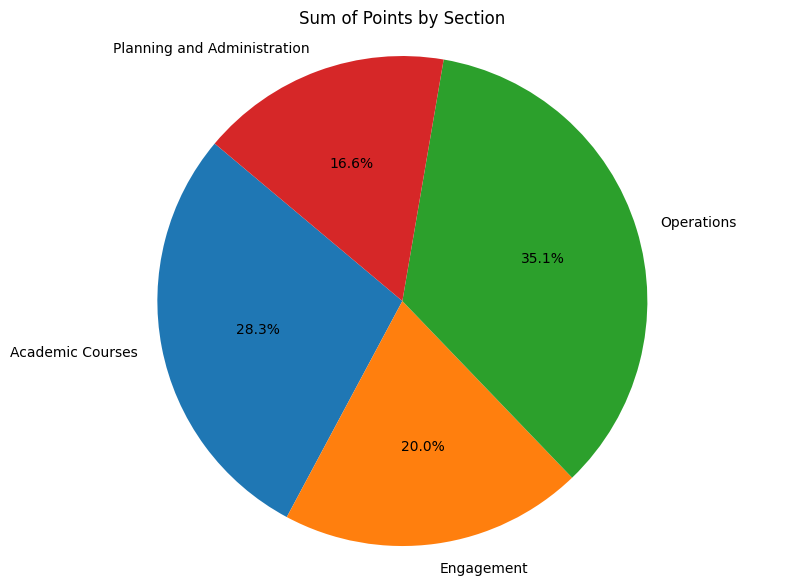

In [126]:
# Sum the points for each section
section_points = df_sections_point.groupby('Section')['Available Points'].sum()

# Create a pie chart
plt.figure(figsize=(10, 7))  # Set the figure size
plt.pie(section_points, labels=section_points.index, autopct='%1.1f%%', startangle=140)
plt.title('Sum of Points by Section')  # Add a title to the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [128]:
# Accessing a specific dataframe
df_scores = all_sheets['FInal_Output']

In [130]:
# df_scores = df_scores.drop(df_scores.columns[[1, 2]], axis=1)


In [131]:
df_scores

,Value,Academic Courses,Learning Outcomes,Undergraduate Program,Graduate Program,Immersive Experience,Sustainability Literacy Assessment,Incentives for Developing Courses,Campus as a Living Laboratory,Research and Scholarship,...,Assessing Diversity and Equity,Support for Underrepresented Groups,Affordability and Access,Committee on Investor Responsibility,Sustainable Investment,Investment Disclosure,Employee Compensation,Assessing Employee Satisfaction,Wellness Program,Workplace Health and Safety
0,"Penn State Erie, The Behrend College",12.91/14.00,7.52/8.00,3.00/3.00,0.00/0,2.00/2.00,0.00/4.00,0.00/2.00,4.00/4.00,12.00/12.00,...,1.00/1.00,3.00/3.00,1.46/4.00,0.00/2.00,0.84/5.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,1.86/3.00,1.00/1.00,1.00/1.00,1.12/2.00
1,"California State University, Fresno",9.20/14.00,8.00/8.00,3.00/3.00,3.00/3.00,2.00/2.00,1.00/4.00,0.00/2.00,4.00/4.00,7.69/12.00,...,0.00/1.00,2.83/3.00,0.82/4.00,0.00/2.00,1.25/5.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,1.69/3.00,0.52/1.00,1.00/1.00,0.78/2.00
2,Lewis University,0.86/14.00,2.11/8.00,3.00/3.00,0.00/3.00,2.00/2.00,0.00/4.00,0.00/2.00,4.00/4.00,4.97/12.00,...,0.00/1.00,0.00/3.00,0.00/4.00,0.00/2.00,0.00/3.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,0.00/3.00,0.00/1.00,0.50/1.00,0.00/2.00
3,DePauw University,7.87/14.00,0.39/8.00,3.00/3.00,0.00/0,2.00/2.00,0.00/4.00,0.00/2.00,1.60/4.00,9.80/12.00,...,1.00/1.00,2.83/3.00,1.56/4.00,1.00/2.00,0.00/4.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,0.00/3.00,1.00/1.00,0.75/1.00,0.70/2.00
4,New Mexico State University,2.81/14.00,5.32/8.00,3.00/3.00,3.00/3.00,0.00/2.00,0.00/4.00,0.00/2.00,4.00/4.00,5.62/12.00,...,0.75/1.00,2.00/3.00,2.02/4.00,0.00/2.00,0.00/4.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,0.00/3.00,0.39/1.00,0.75/1.00,1.19/2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,University of Tennessee at Knoxville,6.69/14.00,0.70/8.00,3.00/3.00,3.00/3.00,2.00/2.00,0.00/4.00,2.00/2.00,4.00/4.00,9.58/12.00,...,0.88/1.00,1.92/3.00,2.27/4.00,0.00/2.00,0.00/4.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,0.75/3.00,0.71/1.00,1.00/1.00,1.66/2.00
274,Hope College,7.10/14.00,0.71/8.00,3.00/3.00,0.00/0,2.00/2.00,1.00/4.00,2.00/2.00,4.00/4.00,12.00/12.00,...,1.00/1.00,3.00/3.00,2.87/4.00,0.00/2.00,0.00/3.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,0.66/3.00,0.95/1.00,1.00/1.00,1.31/2.00
275,Pitzer College,11.67/14.00,4.50/8.00,3.00/3.00,0.00/0,2.00/2.00,0.00/4.00,2.00/2.00,4.00/4.00,8.75/12.00,...,0.88/1.00,2.67/3.00,3.46/4.00,2.00/2.00,1.26/3.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,2.00/3.00,0.67/1.00,0.50/1.00,0.84/2.00
276,Barnard College,12.49/14.00,2.48/8.00,3.00/3.00,0.00/0,2.00/2.00,2.00/4.00,2.00/2.00,4.00/4.00,10.87/12.00,...,1.00/1.00,2.92/3.00,4.00/4.00,0.00/2.00,0.33/3.00Thiscreditisweightedmoreheavilyforins...,0.00/1.00,1.81/3.00,0.71/1.00,1.00/1.00,1.50/2.00


In [ ]:

# Assuming 'df' is your DataFrame
average_scores = df_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar')
plt.title('Average Scores by University')
plt.xlabel('University')
plt.ylabel('Average Score')
plt.show()
